# Loan Approval Prediction Project
Team: Shailja Somani, Verity Pierson, & Mirna Philip\
Dataset Used: Demographic and loan information for select loan applicants, along with if they were approved or not. Retreived from Kaggle at: https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?resource=download\
Project Github: https://github.com/shailja-somani-0/loan-approval-pred

## Import and Clean Dataset

In [1]:
# Import packages necessary
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

In [2]:
# Check working directory if necessary - commented out as not necessary
#os.getcwd()

In [3]:
# Importing the csv file 
loan_df = pd.read_csv('loan_train.csv', header=0, sep=',')
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
# Checking to see what the data looks like
loan_df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [5]:
# Drop all rows with null values
loan_df = loan_df.dropna()
loan_df.shape

(499, 12)

In [6]:
# One-hot encode Area, which has 3 possible answers
loan_encoded = pd.get_dummies(loan_df, columns=['Area'], drop_first=False)

# Encode binary features & target variable to 1 and 0 - use drop_first to have only one column per variable
loan_encoded = pd.get_dummies(loan_encoded, columns=['Gender', 'Married', 'Education', 'Self_Employed','Status'], drop_first=True)

loan_encoded.head()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Rural,Area_Semiurban,Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Status_Y
0,0,584900,0.0,15000000,360.0,1.0,0,0,1,1,0,0,0,1
1,1,458300,150800.0,12800000,360.0,1.0,1,0,0,1,1,0,0,0
2,0,300000,0.0,6600000,360.0,1.0,0,0,1,1,1,0,1,1
3,0,258300,235800.0,12000000,360.0,1.0,0,0,1,1,1,1,0,1
4,0,600000,0.0,14100000,360.0,1.0,0,0,1,1,0,0,0,1


In [7]:
# Split data into X & y and train and test datasets
X = loan_encoded.drop('Status_Y', axis=1)
y = loan_encoded[['Status_Y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38)

# print the shapes of the resulting splits
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (349, 13)
X_test shape: (150, 13)
y_train shape: (349, 1)
y_test shape: (150, 1)


## Do some EDA on the data

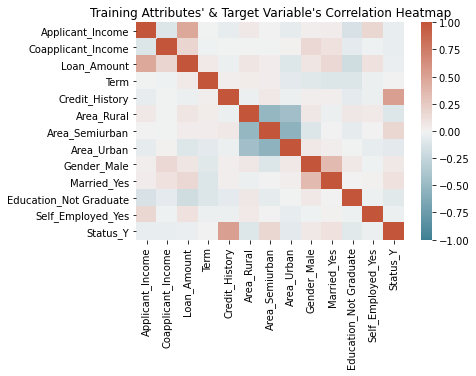

In [8]:
# Create a heatmap to show correlations between all training attributes & target variable (status)
# Get the correlation matrix 
correlation_matrix = loan_encoded.corr()

# create heatmap, set hues for negative, positive areas of map and saturation amount.
# create heatmap given: dataset, value range to anchor map with (-1 and 1), colormap name set above, set title
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue).set(title="Training Attributes' & Target Variable's Correlation Heatmap")
plt.show()

In [9]:
df=loan_encoded

# Normalized bar graph
## *******************************************************************************************

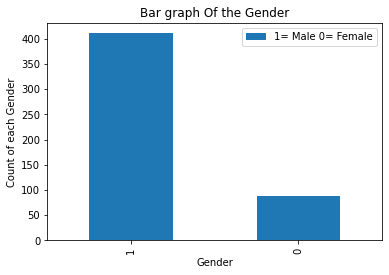

In [10]:
#Bar graph of Gender. 
# the count of each Male 
Gender_bar= loan_encoded.Gender_Male.value_counts()
#ploting 
Gender_bar.plot.bar(x='Gender' ,y= Gender_bar)
plt.title('Bar graph Of the Gender')
plt.ylabel('Count of each Gender')
plt.legend(['1= Male 0= Female'])
plt.xlabel('Gender')
plt.show()

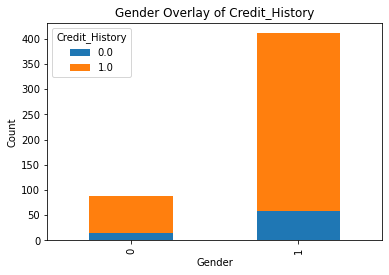

In [12]:
#Bar graph of Gender, with overlay of Credit_History. 
crosstab_01 = pd.crosstab(df['Gender_Male'], df['Credit_History'])
crosstab_01.plot(kind='bar', stacked = True)
#labeling the bar graph 
plt.title('Gender Overlay of Credit_History')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

<AxesSubplot:xlabel='Gender_Male'>

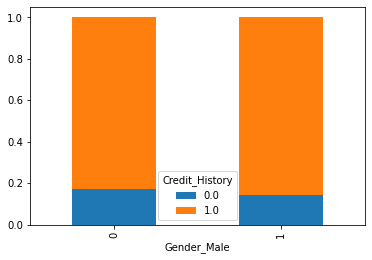

In [13]:
#Normalized bar graph of gender, with overlay of Credit_History.
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

# Contingency table
## ***********************************************************************************

In [14]:
#Build a contingency table 
Table = pd.crosstab(df['Gender_Male'], df['Credit_History'])
Table

Credit_History,0.0,1.0
Gender_Male,,
0,15,73
1,59,352


# CART model
## ***********************************************************************************

In [29]:
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [30]:

df['Applicant_Income'].fillna(df['Applicant_Income'].median(), inplace=True)


In [31]:
# Save the Credit_History variable as y
y = df['Status_Y']
# Create dummy variables for Education_Not_Graduate using the get_dummies() function
edu_dummy = pd.get_dummies(df['Education_Not Graduate'], prefix='edu', drop_first=True)
# Concatenate the Applicant_Income and Education_Not_Graduate dummy variables into a single DataFrame
X = pd.concat([df[['Applicant_Income']], edu_dummy], axis=1)
# Fit a decision tree classifier to the data
cart01 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(X, y)

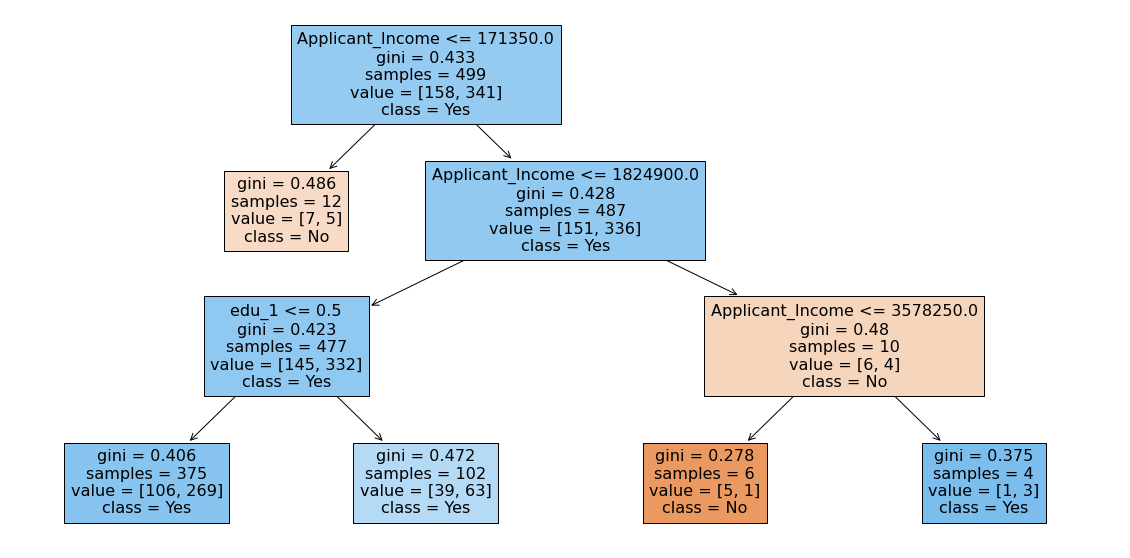

In [32]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(cart01, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [37]:
cart01.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

# C50 model
## ***********************************************************************************

In [33]:
#To obtain the decision tree using entropy 
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(X,y)
#export the summary of the C5.0 tree
#run the export_graphviz() command
export_graphviz(c50_01, out_file = "c50_01.dot")

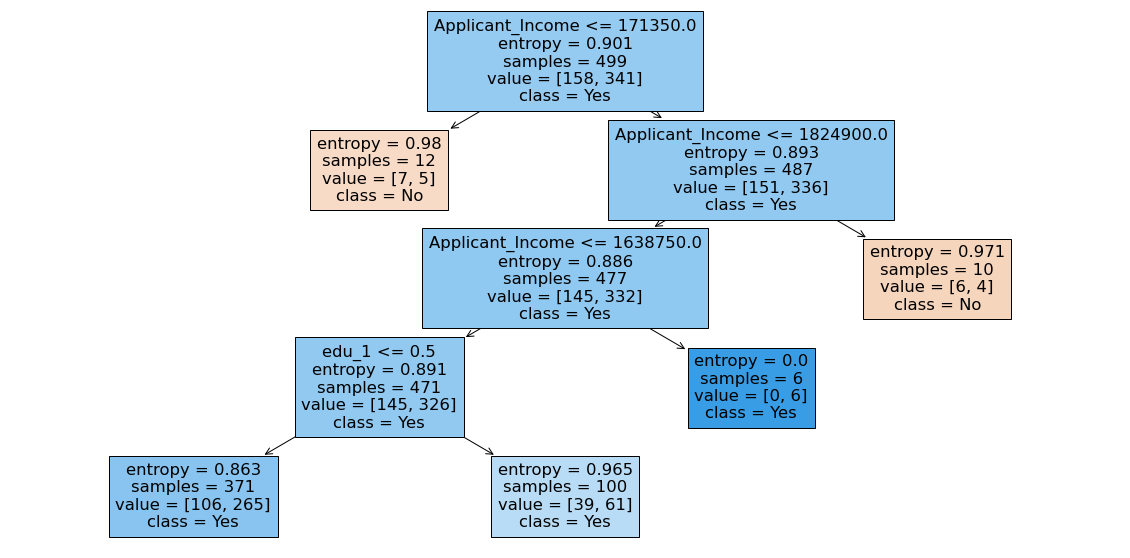

In [34]:
#Visualize the decision tree using the plot_tree function:
plt.figure(figsize=(20,10))
plot_tree(c50_01, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [35]:
c50_01.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

# Random Forests
## *****************************************************************

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [48]:
# Fit a random forest model to the data
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(X, y)

# Plot the first decision tree in the forest
#plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True)


RandomForestClassifier()

In [49]:
rf01.predict(X)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

# Regression prediction
## *********************************************************************************************************

In [53]:
import statsmodels.api as sm


# Include a constant term to represent the intercept
X = pd.DataFrame(df[['Applicant_Income', 'Loan_Amount','Credit_History','Gender_Male','Married_Yes','Education_Not Graduate']])
# Define the target variable
y = df['Status_Y']
# Fit the linear regression model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Status_Y   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.088
Method:                 Least Squares   F-statistic:                              9.020
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                    2.29e-09
Time:                        14:17:11   Log-Likelihood:                         -240.46
No. Observations:                 499   AIC:                                      492.9
Df Residuals:                     493   BIC:                                      518.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Status_Y   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.088
Method:                 Least Squares   F-statistic:                              9.020
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                    2.29e-09
Time:                        14:17:32   Log-Likelihood:                         -240.46
No. Observations:                 499   AIC:                                      492.9
Df Residuals:                     493   BIC:                                      518.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Applicant_Income       -3.712e-09   3.56e-08     -0.104      0.917   -7.37e-08    6.63e-08
Loan_Amount             -1.51e-09   2.32e-09     -0.651      0.515   -6.06e-09    3.04e-09
Credit_History             0.7188      0.038     18.722      0.000       0.643       0.794
Gender_Male                0.0470      0.045      1.047      0.296      -0.041       0.135
Married_Yes                0.0963      0.040      2.421      0.016       0.018       0.174
Education_Not Graduate    -0.0605      0.043     -1.397      0.163      -0.146       0.025
==============================================================================
Omnibus:                       75.923   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.021
Skew:                          -1.119   Prob(JB):                     3.49e-24
Kurtosis:                       3.434   Cond. No.                     4.93e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MAEBaseline and MAERegression
## *****************************************************************************************************************************

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
# Calculate the MAE for the baseline model
MAEBaseline = df['Status_Y'].mean()
print("MAEBaseline =", MAEBaseline)
# Fit a linear regression model
model01 = LinearRegression().fit(df[['Applicant_Income', 'Loan_Amount']], df['Status_Y'])
# Generate predicted values based on the model
predicted = model01.predict(df[['Applicant_Income', 'Loan_Amount']])
# Calculate the MAE for the regression model
MAERegression = mean_absolute_error(df['Status_Y'], predicted)
print("MAERegression =", MAERegression)

MAEBaseline = 0.6833667334669339
MAERegression = 0.4318024236322457
